In [5]:
alpha <- 10.0
beta1 <- 0.1
beta2 <- 0.01
x     <- 1:100
e     <- rnorm(100, 0, sd=5)

In [6]:
y <- alpha + beta1*x + beta2*x**2 + e

In [7]:
time_series <- ts(y, start=1)

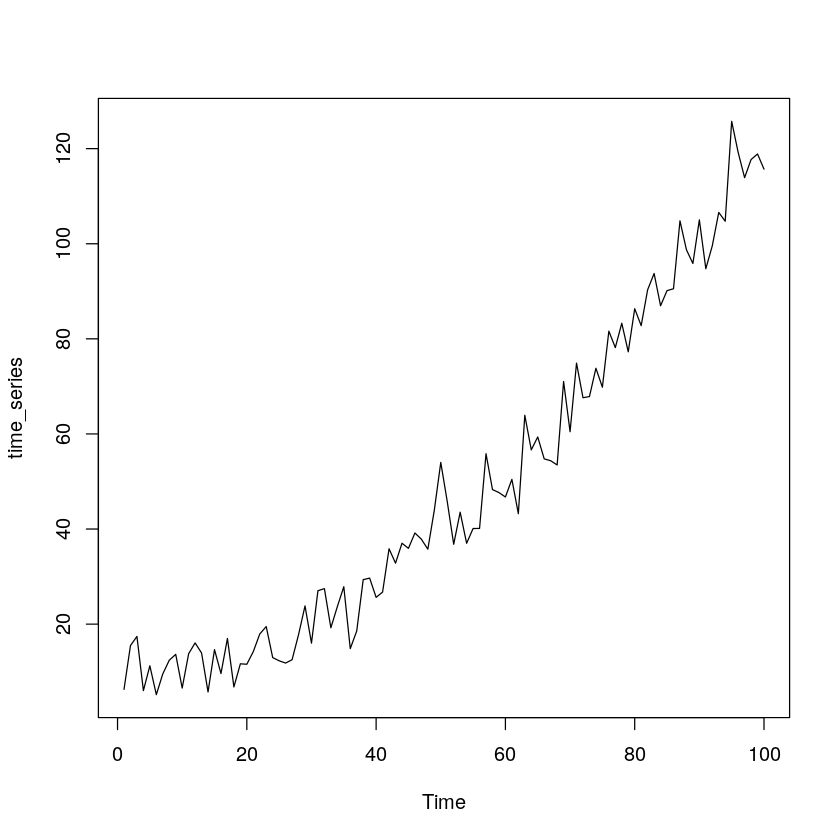

In [8]:
ts.plot(time_series)

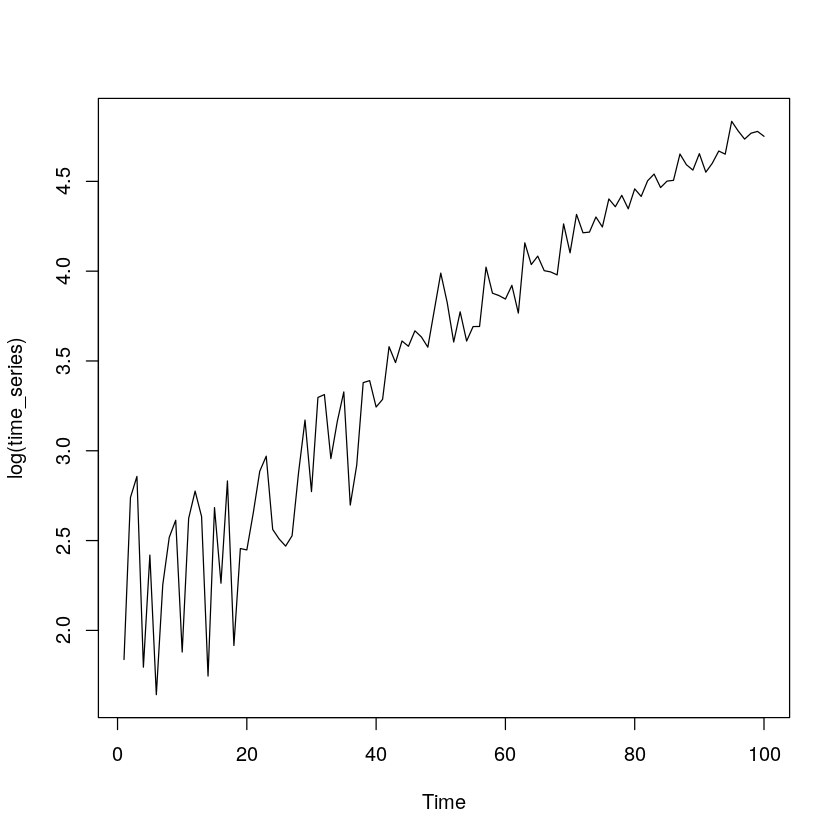

In [9]:
ts.plot(log(time_series))

## `diff()` - difference

In [10]:
dt <- diff(time_series)

In [11]:
print(length(time_series))
print(length(dt))

[1] 100
[1] 99


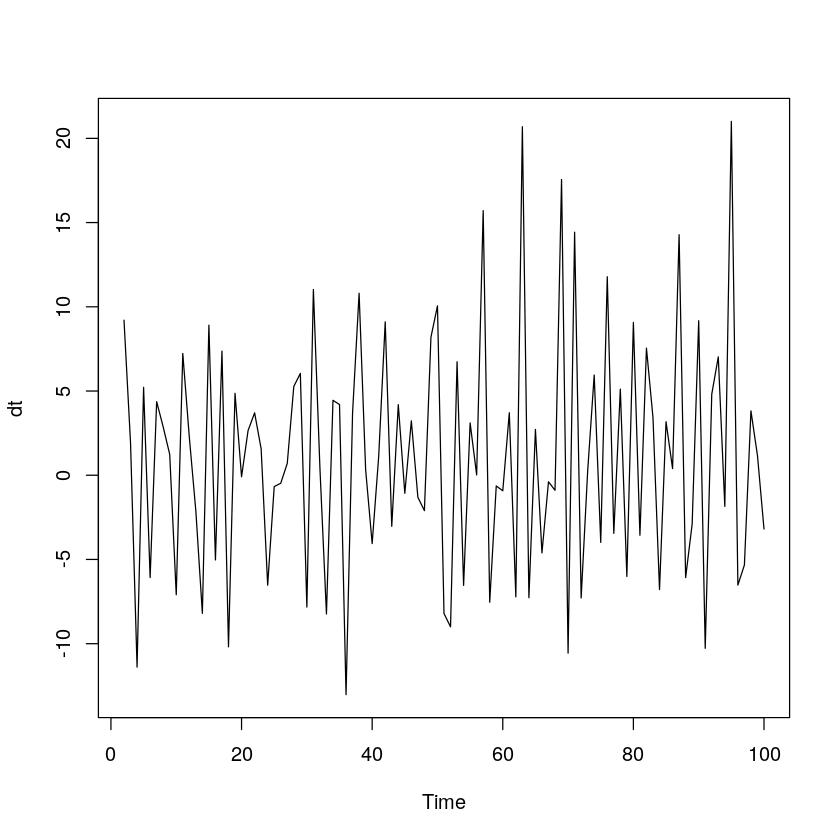

In [12]:
ts.plot(dt)

With some lag

In [13]:
T <- 10
x <- sin(1:100/T)
ts(x)

Time Series:
Start = 1 
End = 100 
Frequency = 1 
  [1]  0.09983342  0.19866933  0.29552021  0.38941834  0.47942554  0.56464247
  [7]  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736  0.93203909
 [13]  0.96355819  0.98544973  0.99749499  0.99957360  0.99166481  0.97384763
 [19]  0.94630009  0.90929743  0.86320937  0.80849640  0.74570521  0.67546318
 [25]  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933  0.14112001
 [31]  0.04158066 -0.05837414 -0.15774569 -0.25554110 -0.35078323 -0.44252044
 [37] -0.52983614 -0.61185789 -0.68776616 -0.75680250 -0.81827711 -0.87157577
 [43] -0.91616594 -0.95160207 -0.97753012 -0.99369100 -0.99992326 -0.99616461
 [49] -0.98245261 -0.95892427 -0.92581468 -0.88345466 -0.83226744 -0.77276449
 [55] -0.70554033 -0.63126664 -0.55068554 -0.46460218 -0.37387666 -0.27941550
 [61] -0.18216250 -0.08308940  0.01681390  0.11654920  0.21511999  0.31154136
 [67]  0.40484992  0.49411335  0.57843976  0.65698660  0.72896904  0.79366786
 [73]  0.85043

## Autoregressive integrated moving average - `arima`

~~~~
arima.sim(model, n, rand.gen = rnorm, innov = rand.gen(n, ...),
          n.start = NA, start.innov = rand.gen(n.start, ...),
          ...)
~~~~


- `model`
A list with component ar and/or ma giving the AR and MA coefficients respectively. Optionally a component order can be used. An empty list gives an ARIMA(0, 0, 0) model, that is white noise.

- `n`
length of output series, before un-differencing. A strictly positive integer.

- `rand.gen`	
optional: a function to generate the innovations.

- `innov`
an optional times series of innovations. If not provided, rand.gen is used.

- `n.start`
length of ‘burn-in’ period. If NA, the default, a reasonable value is computed.

- `start.innov`
an optional times series of innovations to be used for the burn-in period. If supplied there must be at least n.start values (and n.start is by default computed inside the function).

...	
additional arguments for rand.gen. Most usefully, the standard deviation of the innovations generated by rnorm can be specified by sd.

In [20]:
?arima.sim

In [15]:
white_noise <- arima.sim(model = list(order = c(0, 0, 0)), n = 100)

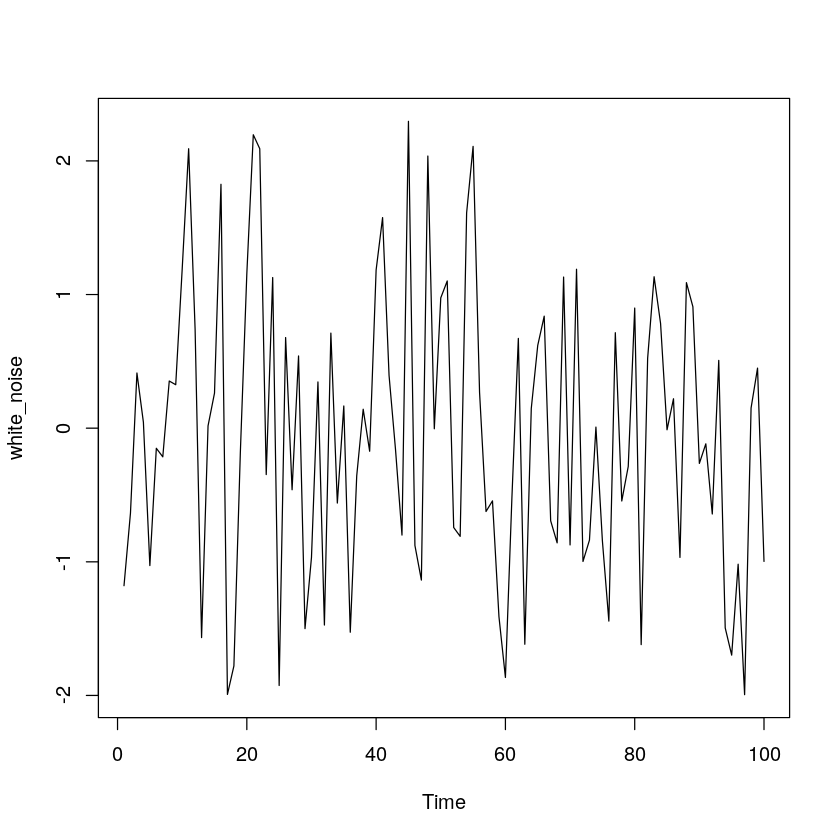

In [16]:
ts.plot(white_noise)

In [17]:
white_noise_2 <- arima.sim(model = list(order = c(0, 0, 0)), mean=100, sd=10, n = 100)

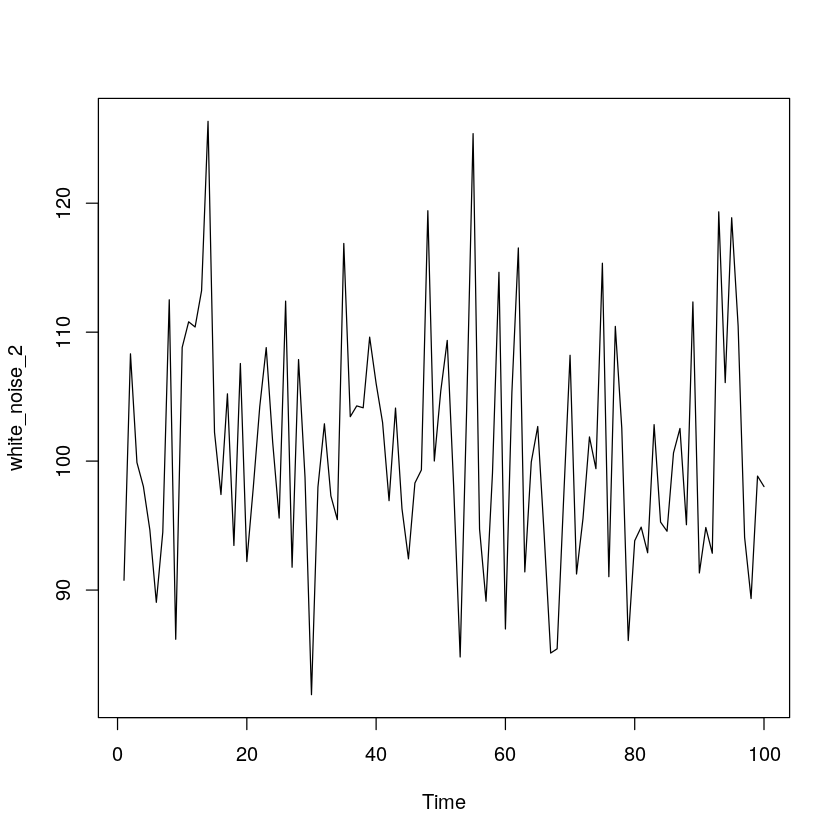

In [18]:
ts.plot(white_noise_2)

### Fitting ARIMA

In [21]:
?arima

Fit an ARIMA model to a univariate time series.

~~~~
arima(x, order = c(0L, 0L, 0L),
      seasonal = list(order = c(0L, 0L, 0L), period = NA),
      xreg = NULL, include.mean = TRUE,
      transform.pars = TRUE,
      fixed = NULL, init = NULL,
      method = c("CSS-ML", "ML", "CSS"), n.cond,
      SSinit = c("Gardner1980", "Rossignol2011"),
      optim.method = "BFGS",
      optim.control = list(), kappa = 1e6)
~~~~

In [26]:
fit = arima(x=white_noise_2, order=c(0,0,0))
fit


Call:
arima(x = white_noise_2, order = c(0, 0, 0))

Coefficients:
      intercept
       100.7991
s.e.     0.9191

sigma^2 estimated as 84.48:  log likelihood = -363.72,  aic = 731.44

In [27]:
mean(white_noise_2)

[1] 100.7991

In [28]:
var(white_noise_2)

[1] 85.33613

## Randowm Walk model

#### Random walk

\begin{equation}
    X_{t} = X_{t-1} + c + \epsilon
\end{equation}

where:
- $\epsilon \sim N(0,\sigma^{2}_{\epsilon})$
- $c$: drift term

parameters of the model:
- $\sigma^{2}_{\epsilon}$
- $c$

#### First order diff

\begin{equation}
    dX = X_{t} - X_{t-1} = c + \epsilon 
\end{equation}

### Example(s)

In [31]:
random_walk <- arima.sim(model=list(order=c(0,1,0)), n=500)

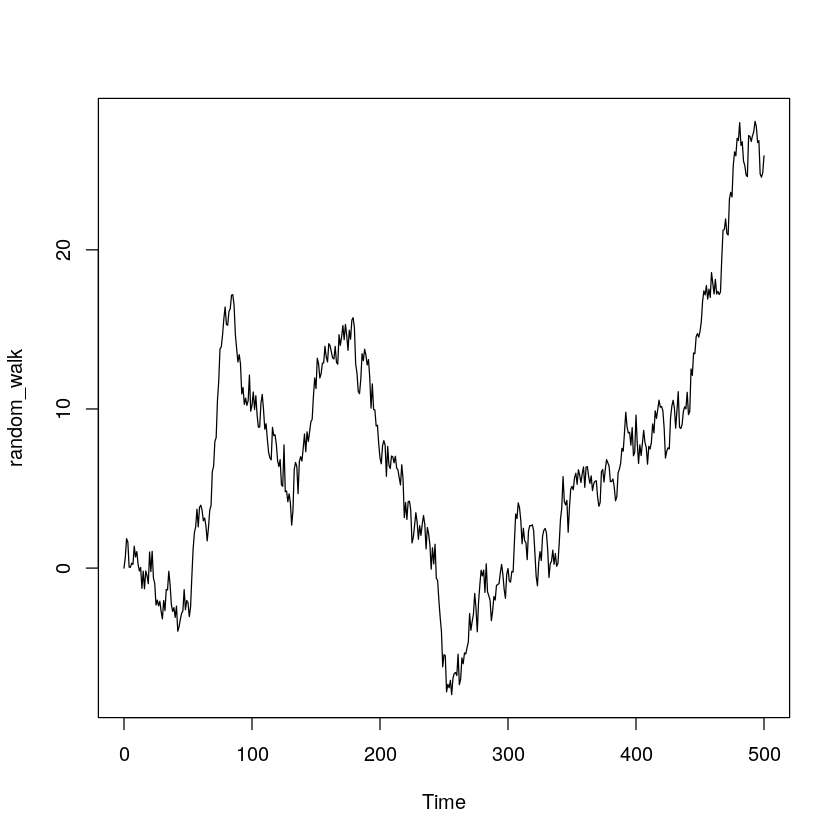

In [32]:
ts.plot(random_walk)

In [ ]:
d = diff(random_walk)